### Task 2:
 
Video games sales (see attached) dataset contains sales data for video games from all around the world, across different platforms, genres and regions. Armed with this data and analysis, future developers can better understand what types of gameplay and mechanics resonate more with players to create a new gaming experience. Undertake a comprehensive analysis to produce a report on
- Insights on what games successful (hit) across the globe
- What other things can we learn from this dataset
- Submit your code and report via Github repo


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.1)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Video Games Sales.csv')
df.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


In [4]:
df.shape

(1907, 13)

There are 1907 rows and 13 columns in the dataset.

In [5]:
# Index column is dropped
df = df.drop('index',axis=1)

In [6]:
# Summary of the dataset
df.describe()

,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1907.0000,1878.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,954.0000,2003.766773,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,550.6478,5.895369,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,1.0000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,477.5000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,954.0000,2005.000000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,1430.5000,2008.000000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,1907.0000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


In [7]:
# Calculation of Null values
df.isnull().sum()

Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [8]:
# Calculation of duplicate values
df.duplicated().sum()

0

In [9]:
# Imputing null values in Year using median of the column
df['Year'] = df['Year'].fillna(df['Year'].median())

In [10]:
df.isnull().sum().sum()

2

In [11]:
# Dropping the remaining null values
df = df.dropna()

In [12]:
df.isnull().sum().sum()

0

In [13]:
df.shape

(1905, 12)

In [14]:
# Changing the datatype of Year
df['Year'] = df['Year'].astype(int)
df.head()

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [15]:
df.columns

Index(['Rank', 'Game Title', 'Platform', 'Year', 'Genre', 'Publisher',
       'North America', 'Europe', 'Japan', 'Rest of World', 'Global',
       'Review'],
      dtype='object')

In [16]:
# Separate dataframe for categorical columns
df_cat = df[['Game Title', 'Platform', 'Genre', 'Publisher' ]]

In [17]:
# Checking unique values in categorical columns
for feature in df_cat.columns: 
    print(feature)
    print(df_cat[feature].value_counts())
    print('\n')
    print('Unique Values in {}: '.format(feature),df_cat[feature].nunique())
    print('\n')
    print('\n')

Game Title
FIFA Soccer 08                                 6
LEGO Indiana Jones: The Original Adventures    6
LEGO Batman: The Videogame                     6
WWE SmackDown vs Raw 2008                      5
FIFA Soccer 10                                 5
                                              ..
NBA Street Vol. 2                              1
Star Wars: Dark Forces                         1
The 7th Guest                                  1
Crash Nitro Kart                               1
FIFA Soccer World Championship                 1
Name: Game Title, Length: 1517, dtype: int64


Unique Values in Game Title:  1517




Platform
PS2     371
PS      222
X360    219
PS3     202
Wii     161
DS      149
GBA      75
XB       72
PC       71
PSP      63
NES      60
N64      57
GC       55
GB       48
SNES     41
3DS      15
GEN      11
DC        6
SAT       3
WiiU      2
SCD       1
PSV       1
Name: Platform, dtype: int64


Unique Values in Platform:  22




Genre
Sports          307

In [18]:
# Top 10 selling games globally
hit_games = df.sort_values(by=['Global'],ascending=False).head(10)
hit_games

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
5,6,New Super Mario Bros.,DS,2006,Platform,Nintendo,10.85,8.87,6.48,2.88,29.08,90.00
6,7,Wii Play,Wii,2006,Misc,Nintendo,13.83,9.11,2.93,2.84,28.71,61.64
7,8,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,84.00
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,13.35,6.48,4.66,2.25,26.75,88.18
9,10,Nintendogs,DS,2005,Simulation,Nintendo,9.02,10.81,1.93,2.73,24.50,85.00


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Wii Sports'),
  Text(1, 0, 'Super Mario Bros.'),
  Text(2, 0, 'Mario Kart Wii'),
  Text(3, 0, 'Wii Sports Resort'),
  Text(4, 0, 'Tetris'),
  Text(5, 0, 'New Super Mario Bros.'),
  Text(6, 0, 'Wii Play'),
  Text(7, 0, 'Duck Hunt'),
  Text(8, 0, 'New Super Mario Bros. Wii'),
  Text(9, 0, 'Nintendogs')])

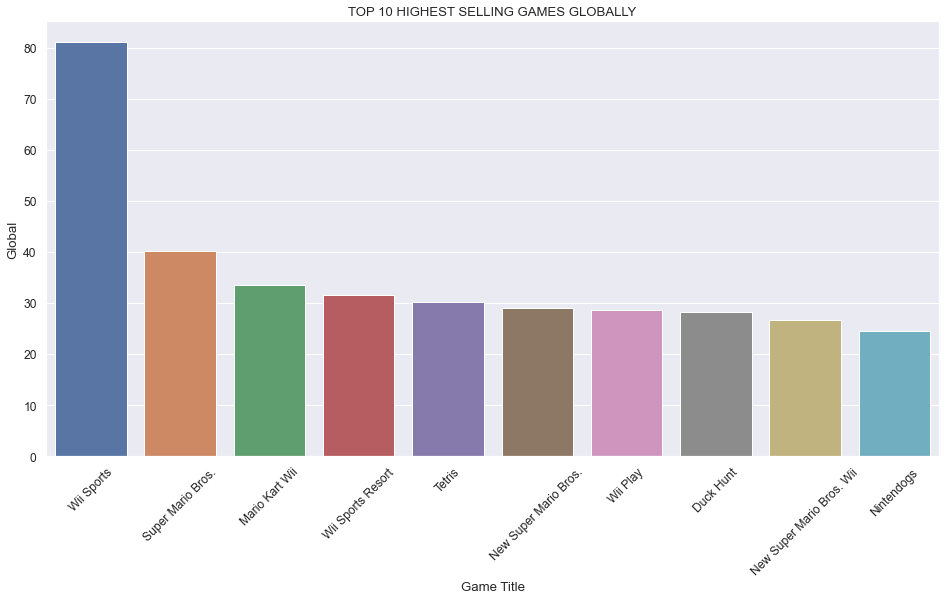

In [19]:
# Top 10 selling games globally
plt.figure(figsize=(16,8))
sns.barplot(hit_games['Game Title'], hit_games['Global'])
plt.title('TOP 10 HIGHEST SELLING GAMES GLOBALLY')
plt.xticks(rotation=45)

Wii sports is the highest selling game

In [20]:
# Genre-wise sale of games globally
genre_wise_sales = df.groupby('Genre')['Global'].sum().sort_values(ascending=False)
print(genre_wise_sales)

Genre
Sports          701.65
Action          637.27
Platform        595.24
Shooter         557.20
Role-Playing    496.20
Racing          451.80
Misc            426.12
Fighting        246.00
Adventure       239.45
Simulation      205.14
Puzzle          108.65
Strategy         77.80
Name: Global, dtype: float64


Text(0.5, 1.0, 'HIGHEST SELLING GENRE OF GAMES GLOBALLY')

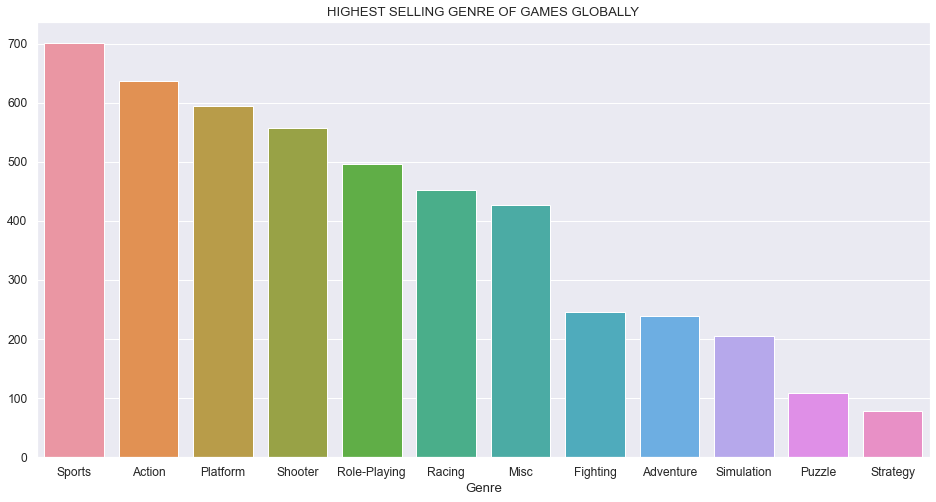

In [21]:
# Genre-wise sale of games globally
plt.figure(figsize=(16,8))
sns.barplot(genre_wise_sales.index, genre_wise_sales.values)
plt.title('HIGHEST SELLING GENRE OF GAMES GLOBALLY')

Highest selling genre worldwide is Sports 

In [22]:
# Platform-wise sale of games globally
platform_wise_sales = df.groupby('Platform')['Global'].sum().sort_values(ascending=False)
print(platform_wise_sales)

Platform
PS2     820.79
Wii     590.16
X360    545.70
DS      453.79
PS      448.69
PS3     446.34
NES     213.14
GB      199.01
PC      175.22
GBA     160.37
N64     147.47
SNES    134.85
PSP     110.22
XB      110.13
GC      103.13
3DS      37.93
GEN      26.79
DC        8.84
SAT       4.16
WiiU      3.36
SCD       1.50
PSV       0.93
Name: Global, dtype: float64


Text(0.5, 1.0, 'HIGHEST SELLING GAMES IN DIFFERENT PLATFORMS')

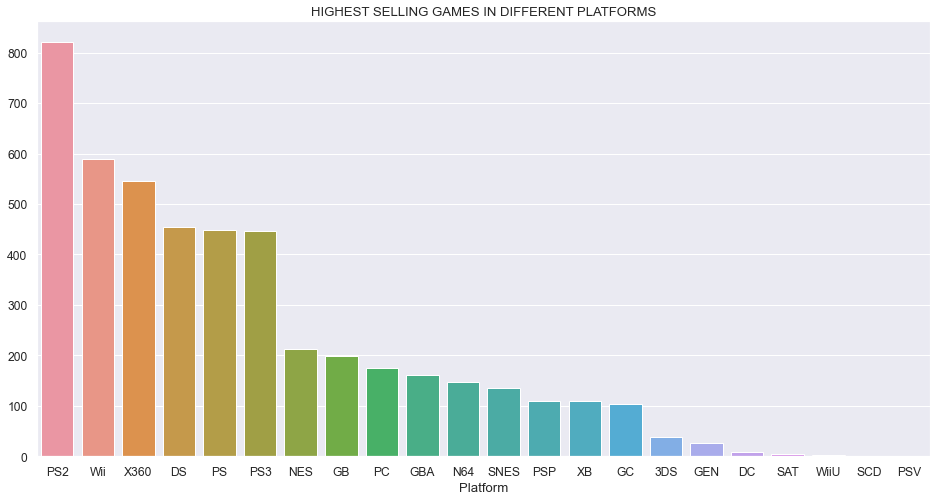

In [23]:
# Platform-wise sale of games globally
plt.figure(figsize=(16,8))
sns.barplot(platform_wise_sales.index, platform_wise_sales.values)
plt.title('HIGHEST SELLING GAMES IN DIFFERENT PLATFORMS')

Maximum number of games are sold through the Platform PS2

In [24]:
# Top 10 Publisher of games globally
publisher_wise_sales = df.groupby('Publisher')['Global'].sum().sort_values(ascending=False).head(10)
print(publisher_wise_sales)

Publisher
Nintendo                       1448.84
Electronic Arts                 633.36
Sony Computer Entertainment     377.61
Activision                      371.42
Take-Two Interactive            208.42
Ubisoft                         196.32
Microsoft Game Studios          169.73
THQ                             142.98
Sega                            122.67
Capcom                          114.33
Name: Global, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Sony Computer Entertainment'),
  Text(3, 0, 'Activision'),
  Text(4, 0, 'Take-Two Interactive'),
  Text(5, 0, 'Ubisoft'),
  Text(6, 0, 'Microsoft Game Studios'),
  Text(7, 0, 'THQ'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Capcom')])

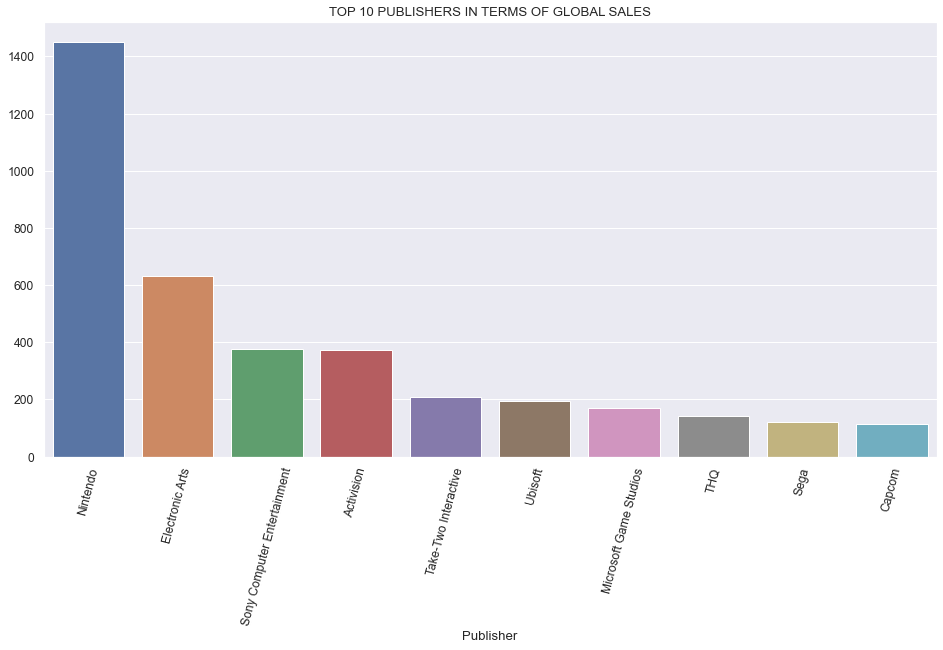

In [25]:
# Top 10 Publisher of games globally
plt.figure(figsize=(16,8))
sns.barplot(publisher_wise_sales.index, publisher_wise_sales.values)
plt.title('TOP 10 PUBLISHERS IN TERMS OF GLOBAL SALES')
plt.xticks(rotation=75)

Top Publisher who sells highest number of games worldwide is Nintendo

In [26]:
# Worldwide Trend in sale of games 
yearly_sales = df.groupby('Year')['Global'].sum()
print(yearly_sales)

Year
1983     10.96
1984     45.66
1985     49.57
1986     27.17
1987     17.06
1988     42.19
1989     62.87
1990     46.48
1991     21.41
1992     71.47
1993     29.36
1994     58.86
1995     49.21
1996    111.85
1997    120.69
1998    176.57
1999    176.24
2000    143.47
2001    234.65
2002    248.17
2003    211.74
2004    271.01
2005    322.66
2006    355.65
2007    371.97
2008    385.92
2009    357.13
2010    334.11
2011    251.01
2012    137.41
Name: Global, dtype: float64


Text(0.5, 1.0, 'TREND OF SALES OF GAMES OVER THE YEARS')

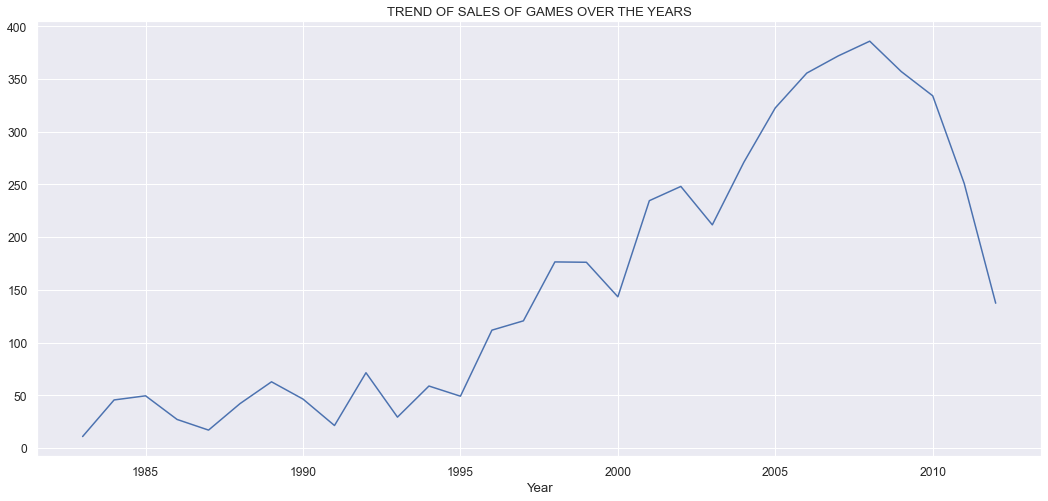

In [27]:
# Worldwide Trend in sale of games 
plt.figure(figsize=(18,8))
sns.lineplot(yearly_sales.index, yearly_sales.values)
plt.title('TREND OF SALES OF GAMES OVER THE YEARS')

Text(0.5, 1.0, 'YEAR-WISE SALES OF GAMES')

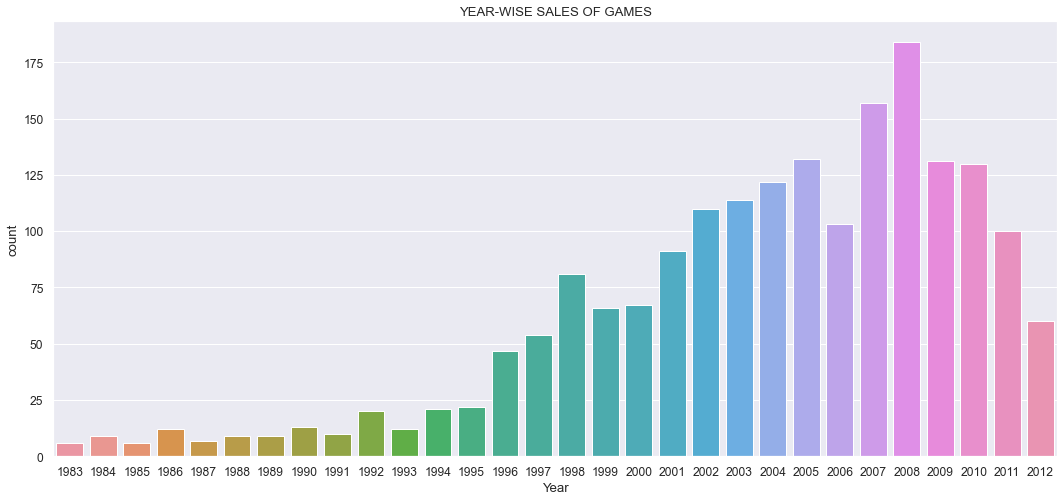

In [28]:
# Worldwide Trend in sale of games 
plt.figure(figsize=(18,8))
sns.countplot(df['Year'])
plt.title('YEAR-WISE SALES OF GAMES')

Highest sales is in 2008. Overall trend in the sale of games is increasing till 2008, then the trend falls

In [29]:
# Sales in the last 6 years
recent_years_sales = df[df['Year']>2006]
recent_years_sales

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,13.35,6.48,4.66,2.25,26.75,88.18
11,12,Wii Fit,Wii,2007,Sports,Nintendo,8.91,8.15,3.60,2.08,22.74,81.20
13,14,Wii Fit Plus,Wii,2009,Sports,Nintendo,8.82,7.94,2.53,1.86,21.15,80.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1900,1901,Army of Two: The 40th Day,X360,2010,Shooter,Electronic Arts,0.52,0.22,0.00,0.08,0.83,72.32
1901,1902,Medal of Honor: Warfighter,X360,2012,Shooter,Electronic Arts,0.42,0.32,0.01,0.09,0.83,68.00
1903,1904,Xenoblade Chronicles,Wii,2010,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1905,SingStar Abba,PS3,2008,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00


Text(0.5, 1.0, "RECENT YEARS' SALES ACCORDING TO GENRE OF GAMES")

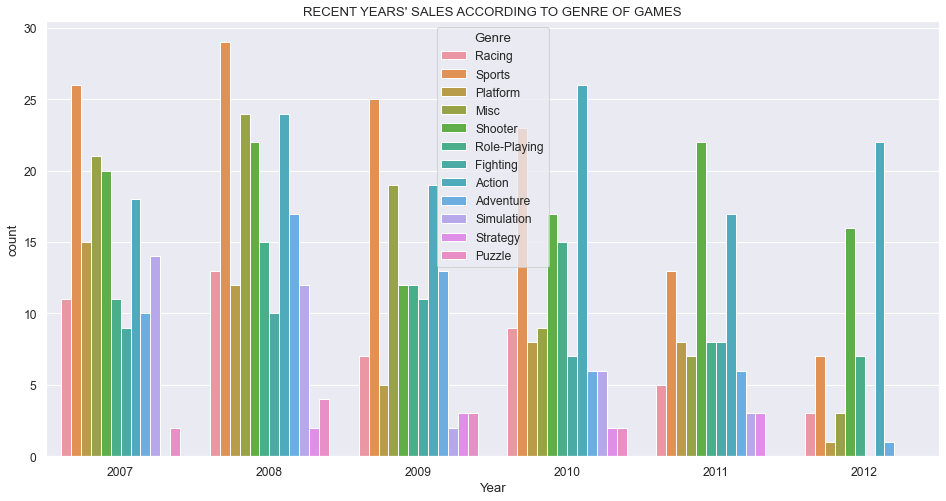

In [30]:
# Sales in the last 6 years with respect to genre
plt.figure(figsize=(16,8))
sns.countplot(recent_years_sales['Year'], hue=recent_years_sales['Genre'])
plt.title("RECENT YEARS' SALES ACCORDING TO GENRE OF GAMES" )

In 2008, highest games were sold in Sports genre and in the recent 6 years, 2012 has the least sale of games

Text(0.5, 1.0, "RECENT YEARS' SALES ACCORDING TO DIFFERENT PLATFORMS")

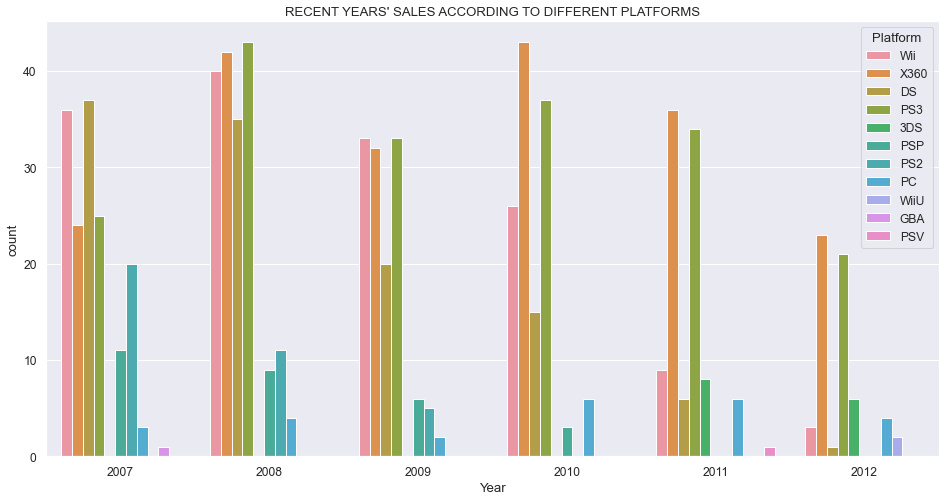

In [31]:
# Sales in the last 6 years with respect to platform
plt.figure(figsize=(16,8))
sns.countplot(recent_years_sales['Year'], hue=recent_years_sales['Platform'])
plt.title("RECENT YEARS' SALES ACCORDING TO DIFFERENT PLATFORMS" )

In 2008, the greatest number of games were sold in PS3 Platform

Text(0.5, 1.0, 'REGION-WISE SALES')

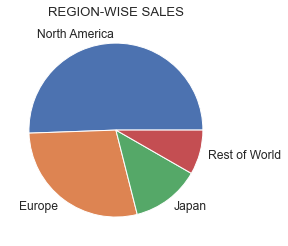

In [32]:
# Region wise sale of games
region_wise_sales = df[['North America', 'Europe', 'Japan', 'Rest of World']]
total_sales = region_wise_sales.sum(axis=0)
plt.pie(total_sales, labels=total_sales.index)
plt.title('REGION-WISE SALES')

Highest sales are from North America followed by Europe.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Wii Sports'),
  Text(1, 0, 'Super Mario Bros.'),
  Text(2, 0, 'Duck Hunt'),
  Text(3, 0, 'Tetris'),
  Text(4, 0, 'Wii Sports Resort'),
  Text(5, 0, 'Mario Kart Wii'),
  Text(6, 0, 'Wii Play'),
  Text(7, 0, 'Kinect Adventures!'),
  Text(8, 0, 'New Super Mario Bros. Wii'),
  Text(9, 0, 'Super Mario World')])

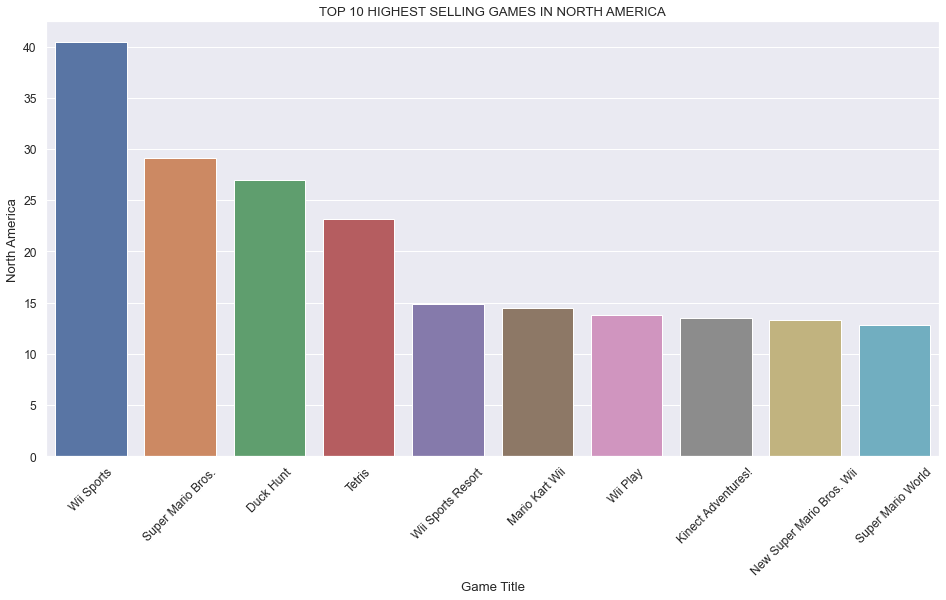

In [33]:
# Top 10 sale of games in North America
hit_games_NA = df.sort_values(by=['North America'],ascending=False).head(10)
plt.figure(figsize=(16,8))
sns.barplot(hit_games_NA['Game Title'], hit_games_NA['North America'])
plt.title('TOP 10 HIGHEST SELLING GAMES IN NORTH AMERICA')
plt.xticks(rotation=45)

Wii Sports is the highest selling game in North America

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Wii Sports'),
  Text(1, 0, 'Mario Kart Wii'),
  Text(2, 0, 'Nintendogs'),
  Text(3, 0, 'Wii Sports Resort'),
  Text(4, 0, 'Wii Play'),
  Text(5, 0, 'Brain Age: Train Your Brain in Minutes a Day'),
  Text(6, 0, 'New Super Mario Bros.'),
  Text(7, 0, 'Grand Theft Auto: San Andreas'),
  Text(8, 0, 'Wii Fit'),
  Text(9, 0, 'Wii Fit Plus')])

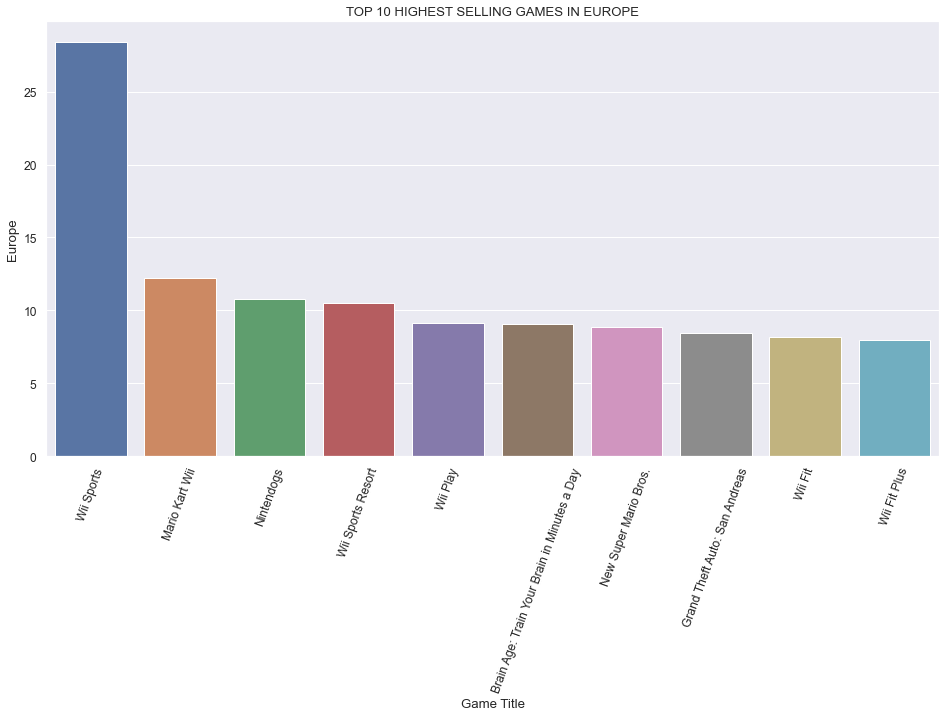

In [34]:
# Top 10 sale of games in Europe
hit_games_E = df.sort_values(by=['Europe'],ascending=False).head(10)
plt.figure(figsize=(16,8))
sns.barplot(hit_games_E['Game Title'], hit_games_E['Europe'])
plt.title('TOP 10 HIGHEST SELLING GAMES IN EUROPE')
plt.xticks(rotation=70)

Wii Sports is the highest selling game in Europe

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Pokémon Gold / Silver Version'),
  Text(1, 0, 'Super Mario Bros.'),
  Text(2, 0, 'New Super Mario Bros.'),
  Text(3, 0, 'Pokémon Diamond / Pearl Version'),
  Text(4, 0, 'Pokémon Black / White Version'),
  Text(5, 0, 'Pokémon Ruby / Sapphire Version'),
  Text(6, 0, 'Animal Crossing: Wild World'),
  Text(7, 0, 'Brain Age 2: More Training in Minutes a Day'),
  Text(8, 0, 'New Super Mario Bros. Wii'),
  Text(9, 0, 'Dragon Quest IX: Sentinels of the Starry Skies')])

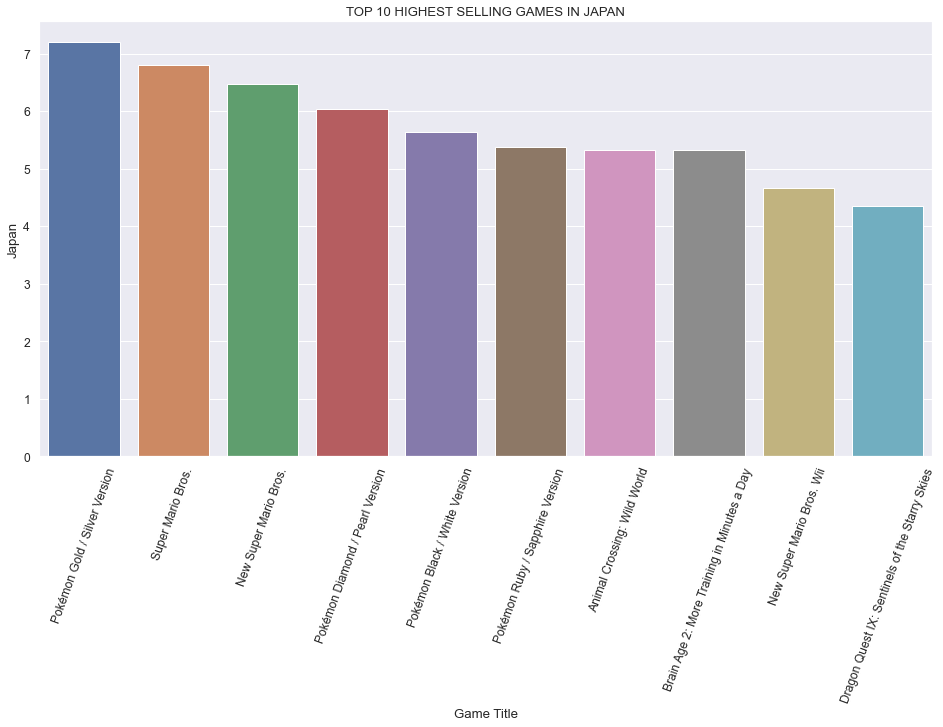

In [35]:
# Top 10 sale of games in Japan
hit_games_J = df.sort_values(by=['Japan'],ascending=False).head(10)
plt.figure(figsize=(16,8))
sns.barplot(hit_games_J['Game Title'], hit_games_J['Japan'])
plt.title('TOP 10 HIGHEST SELLING GAMES IN JAPAN')
plt.xticks(rotation=70)

Pokeman Gold/Silver Version is the highest selling game in Japan

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Wii Sports'),
  Text(1, 0, 'Mario Kart Wii'),
  Text(2, 0, 'Wii Sports Resort'),
  Text(3, 0, 'New Super Mario Bros.'),
  Text(4, 0, 'Wii Play'),
  Text(5, 0, 'Nintendogs'),
  Text(6, 0, 'Grand Theft Auto: San Andreas'),
  Text(7, 0, 'New Super Mario Bros. Wii'),
  Text(8, 0, 'Wii Fit'),
  Text(9, 0, 'Brain Age: Train Your Brain in Minutes a Day')])

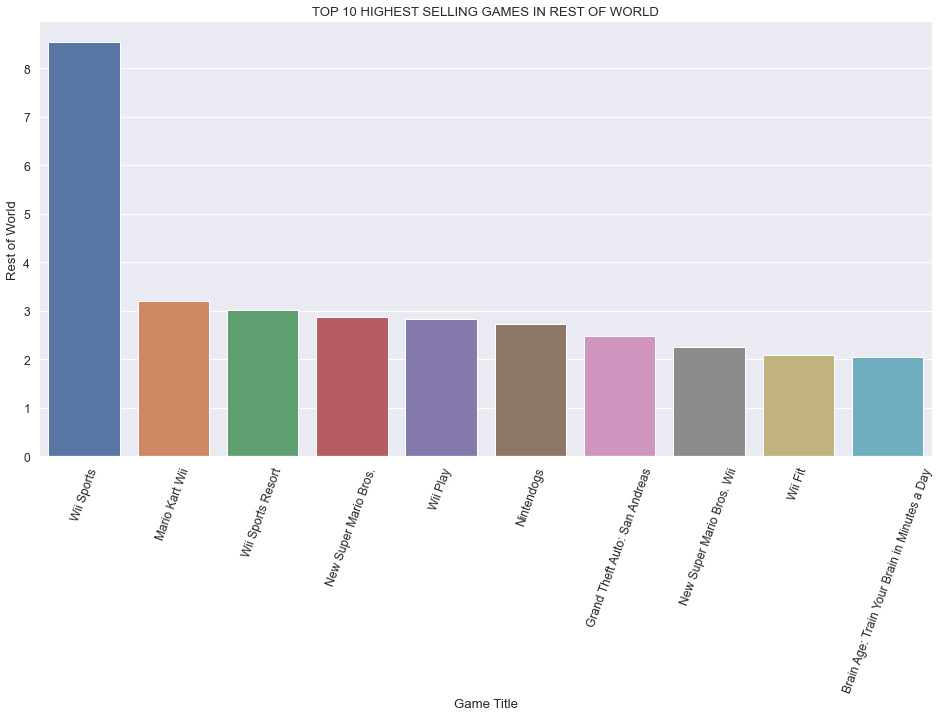

In [36]:
# Top 10 sale of games in Rest of World
hit_games_RW = df.sort_values(by=['Rest of World'],ascending=False).head(10)
plt.figure(figsize=(16,8))
sns.barplot(hit_games_RW['Game Title'], hit_games_RW['Rest of World'])
plt.title('TOP 10 HIGHEST SELLING GAMES IN REST OF WORLD')
plt.xticks(rotation=70)

Wii Sports is the highest selling game in Rest of World

In [37]:
df_regions = df[['North America', 'Europe', 'Japan', 'Rest of World']]

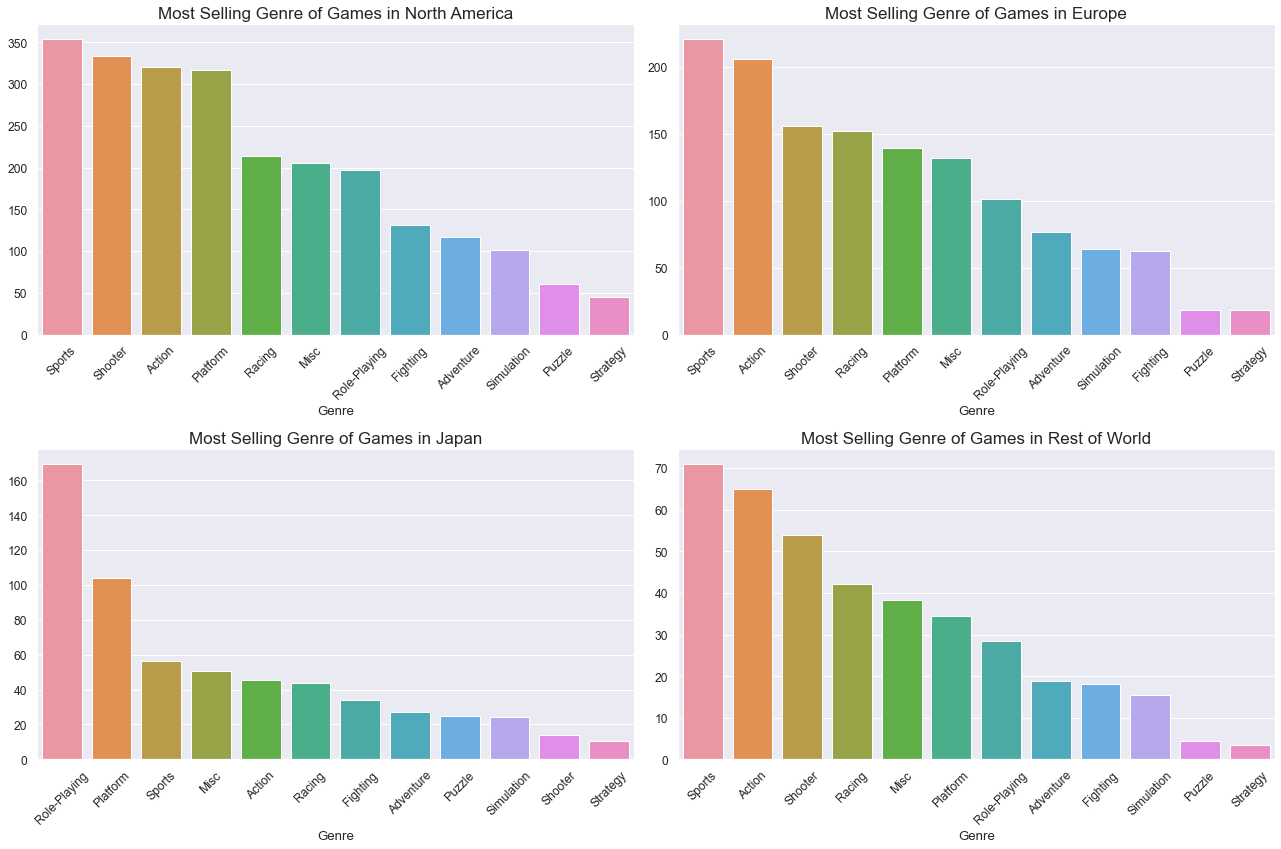

In [38]:
# Sales of games in differnt regions with respect to genre of games
plt.figure(figsize=(18,12))
feature_list = df_regions.columns
for i in range(len(feature_list)):
    genre_wise_sales_region = df.groupby('Genre')[feature_list[i]].sum().sort_values(ascending=False)
    plt.subplot(2, 2, i + 1)
    sns.barplot(genre_wise_sales_region.index, genre_wise_sales_region.values, data = df)
    plt.title('Most Selling Genre of Games in {}'.format(feature_list[i]),fontsize=17)
    plt.xticks(rotation=45)
    plt.tight_layout()

In Japan, highest number of games sold belong to Role-Playing Genre while in other regions, highest number of games sold belong to Sports Genre.

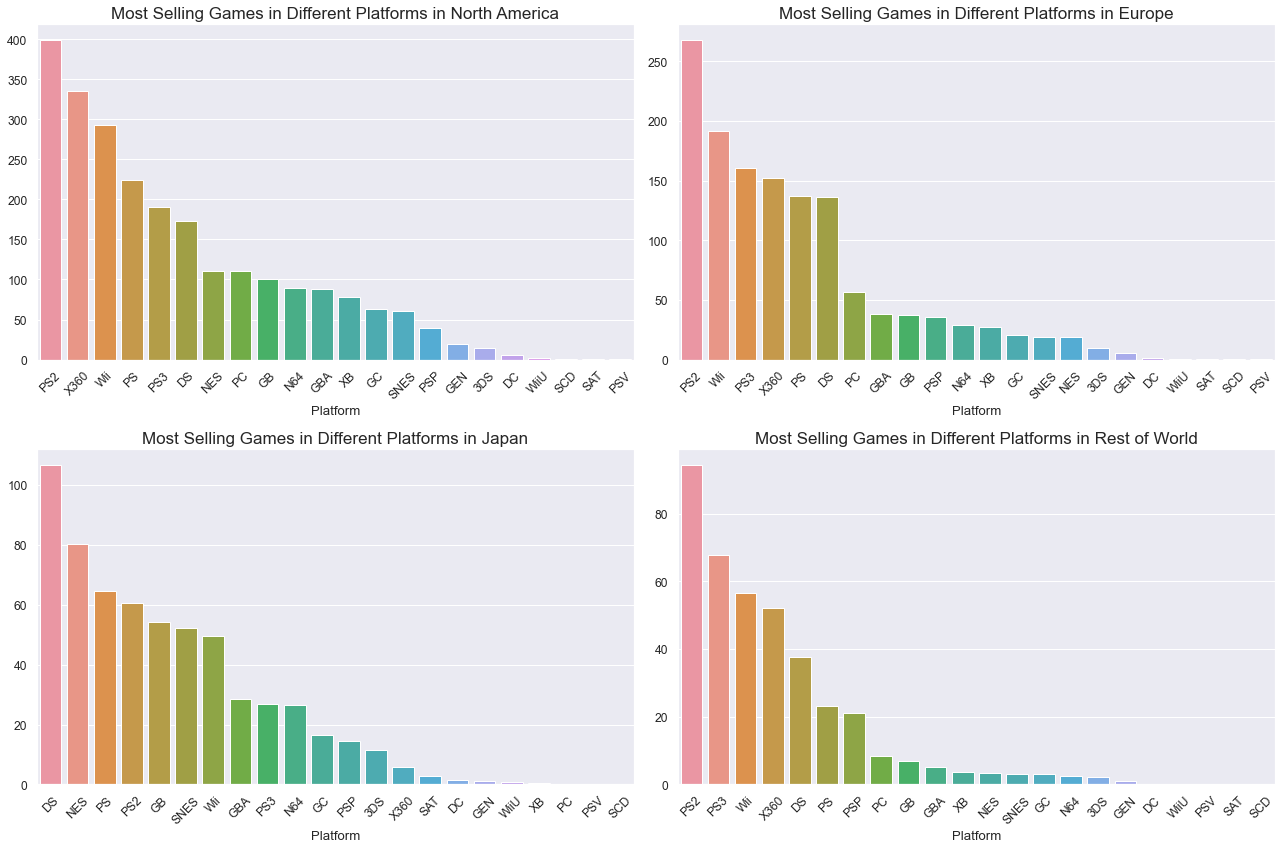

In [39]:
# Sales of games in differnt regions with respect to platform
plt.figure(figsize=(18,12))
feature_list = df_regions.columns
for i in range(len(feature_list)):
    platform_wise_sales_region = df.groupby('Platform')[feature_list[i]].sum().sort_values(ascending=False)
    plt.subplot(2, 2, i + 1)
    sns.barplot(platform_wise_sales_region.index, platform_wise_sales_region.values, data = df)
    plt.title('Most Selling Games in Different Platforms in {}'.format(feature_list[i]),fontsize=17)
    plt.xticks(rotation=45)
    plt.tight_layout()

In Japan most of the games are sold via DS Platform whereas in other regions, highest number of games are sold via PS2 Platform

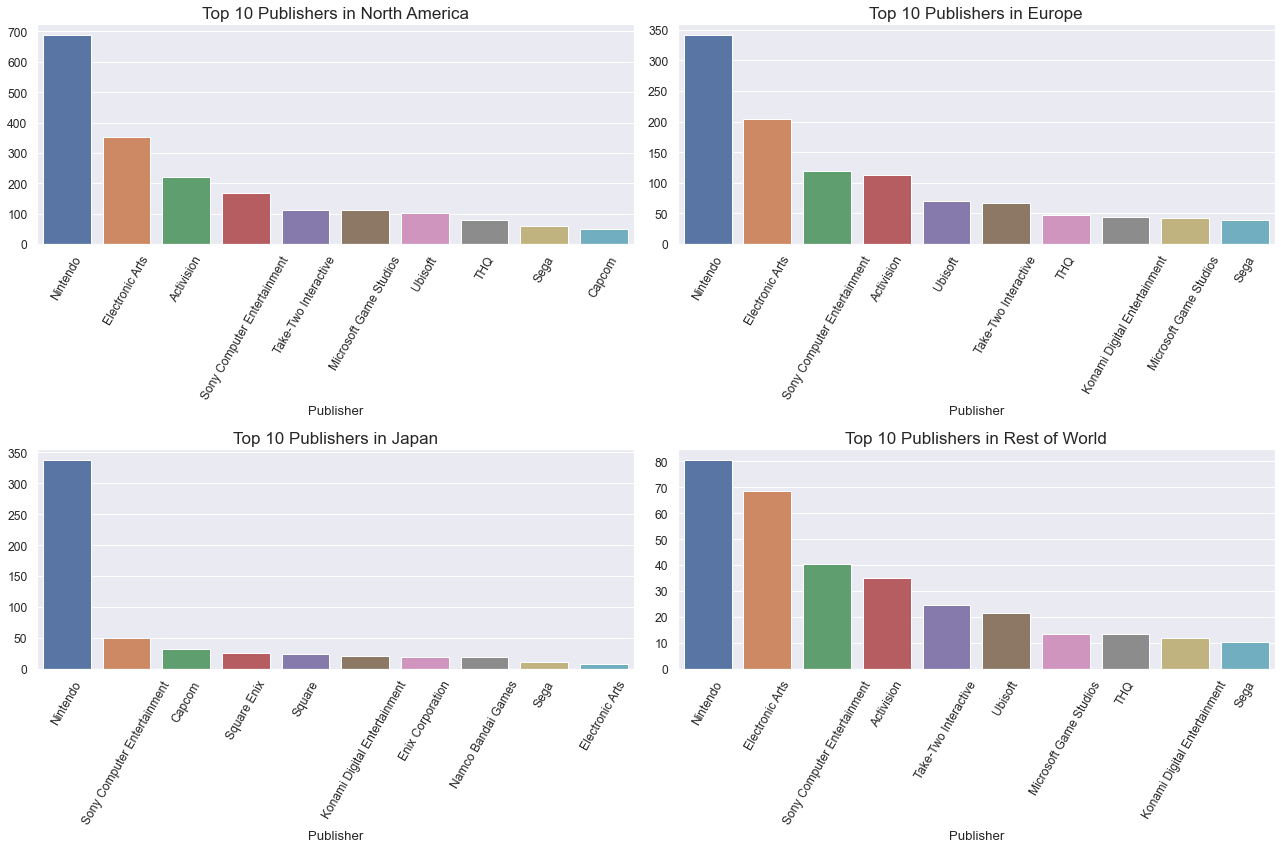

In [40]:
# Top 10 publishers in different regions
plt.figure(figsize=(18,12))
feature_list = df_regions.columns
for i in range(len(feature_list)):
    publisher_wise_sales_region = df.groupby('Publisher')[feature_list[i]].sum().sort_values(ascending=False).head(10)
    plt.subplot(2, 2, i + 1)
    sns.barplot(publisher_wise_sales_region.index, publisher_wise_sales_region.values, data = df)
    plt.title('Top 10 Publishers in {}'.format(feature_list[i]),fontsize=17)
    plt.xticks(rotation=60)
    plt.tight_layout()

The top most publisher who sells highest number of games in all the regions is Nintendo

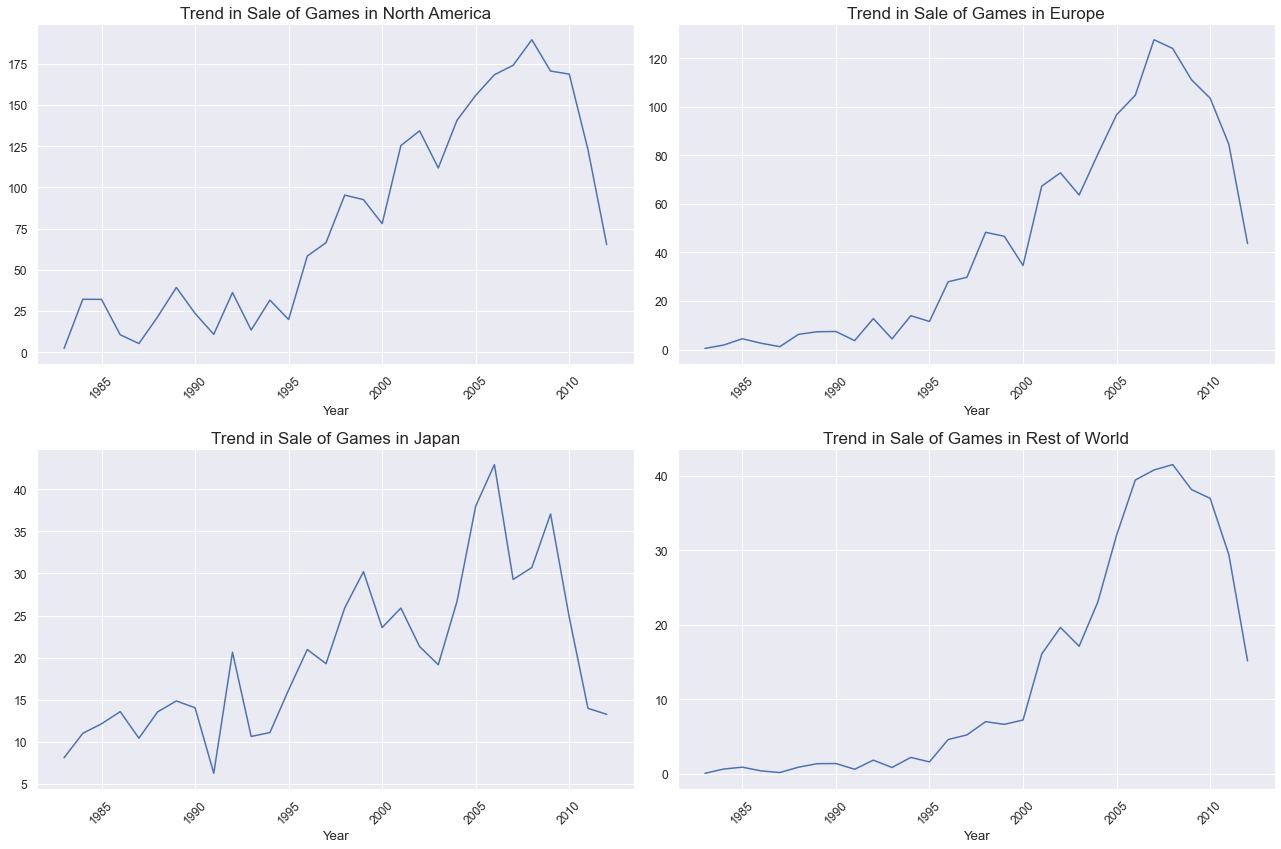

In [41]:
# Trend of sales in differnt regions
plt.figure(figsize=(18,12))
feature_list = df_regions.columns
for i in range(len(feature_list)):
    yearly_sales_region = df.groupby('Year')[feature_list[i]].sum()
    plt.subplot(2, 2, i + 1)
    sns.lineplot(yearly_sales_region.index, yearly_sales_region.values)
    plt.title('Trend in Sale of Games in {}'.format(feature_list[i]),fontsize=17)
    plt.xticks(rotation=45)
    plt.tight_layout()

The sales in Japan are highly volatile compared to the other regions. The overall trend in the sale of video games in all the regions is increasing till late 2000s.

### Conclusion
- Wii Sports is the most succesful game across the globe
- The video game sale in Japan is different from the sales in other parts of the country. This might explain the volatility in the sales over the years. 